In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install texthero
import pandas as pd
import numpy as np
import string
import re
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import texthero as hero
import nltk

     |████████████████████████████████| 235 kB 7.2 MB/s 
     |████████████████████████████████| 1.5 MB 49.5 MB/s 
     |████████████████████████████████| 749 kB 45.2 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/5153/train.csv")

In [4]:
df_test = pd.read_csv("/content/gdrive/MyDrive/5153/test.csv")

In [5]:
df.Comment = df.Comment.astype('string')
text = df.Comment
clean_text = hero.remove_stopwords(text)
clean_text = hero.remove_urls(clean_text)
clean_text = hero.lowercase(clean_text)
clean_text = hero.tokenize(clean_text)

df['Comment'] = clean_text
df
for i in range(0,48162):
    df['Comment'][i] = ' '.join(clean_text[i])
    
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Comment,Outcome,Id
0,use variables outer function instead global va...,1,17489
1,' looking something nice python ' x [ - 1] not...,1,37982
2,"use tail ( ) function : tail(vector , n=1 ) ni...",1,29641


In [6]:
text = df_test.Comment
clean_text = hero.remove_stopwords(text)
clean_text = hero.remove_urls(clean_text)
clean_text = hero.lowercase(clean_text)
clean_text = hero.tokenize(clean_text)

#print(clean_text)
#print(type(clean_text))

df_test['Comment'] = clean_text

for i in range(0,28863):
    df_test['Comment'][i] = ' '.join(clean_text[i])
    
display(df_test.head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Comment,Id
0,clearly worked another hour posted question . ...,57525
1,cases r interpreted language runs read-evaluat...,62692
2,algorithms eigen value computations scale big-...,54789


In [7]:
!pip install torch
!pip install transformers
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 6.5 MB 33.5 MB/s 
     |████████████████████████████████| 596 kB 45.4 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, df['Outcome'].values, test_size=0.2, random_state=42, stratify=df['Outcome'].values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [ ]:
#df[['Outcome','data_type','Comment']].sort_values('Outcome').groupby(['Outcome','Comment','data_type']).count()

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
                                          
max_length = 128

encoded_data_train = tokenizer.batch_encode_plus(
    df[df['data_type']=='train']['Comment'].values.tolist(), 
    add_special_tokens=True,  
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [10]:
encoded_data_val = tokenizer.batch_encode_plus(
    df[df['data_type']=='val']['Comment'].values.tolist(), 
    
    add_special_tokens=True, 
#     add_special_tokens=False, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [11]:
encoded_data_test = tokenizer.batch_encode_plus(
    df_test['Comment'].values.tolist(), 
    
    add_special_tokens=True,
#     add_special_tokens=False, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_length, 
    return_tensors='pt'
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [12]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].Outcome.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].Outcome.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test)


In [13]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=10,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 1

dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, sampler=SequentialSampler(dataset_val), batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, batch_size=batch_size)

In [15]:
!pip install torch==1.10.0

In [16]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),lr=1e-5,eps=1e-8)                  
epochs = 1
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0,num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [17]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [18]:
# Making the code device-agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")

cuda
Is CUDA supported by this system? True
CUDA version: 11.1
ID of current CUDA device:0
Name of current CUDA device:Tesla K80


In [19]:
import random


seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

torch.cuda.empty_cache()

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()

        predictions.append(logits)
        true_vals.append(label_ids)
        
            
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

def predict(dataloader_test):

    model.eval()
    

    predictions = []
    
    for batch in dataloader_test:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':batch[0],
              'attention_mask':batch[1],}

        with torch.no_grad():        
            outputs = model(**inputs)
            
#         loss = outputs[0]
        logits = outputs[0]

        logits = logits.detach().cpu().numpy()

        predictions.append(logits)
        
            
    
    predictions = np.concatenate(predictions, axis=0)
            
    return predictions

In [20]:
from sklearn.metrics import f1_score, accuracy_score

def confusion_matrix_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return confusion_matrix(labels_flat, preds_flat)
    
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, preds_flat)

def accuracy_per_class(preds, labels):
#     label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
#         print(f'Class: {label_dict_inverse[label]}')
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [21]:
import torch
from torch import nn, Tensor
import torchvision


In [24]:
start = 1
for epoch in tqdm(range(start, epochs+start)):
    
    # move model to cuda
    model.cuda()
    model.train()
    loss_train_total = 0
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
               
        inputs = {'input_ids':batch[0],
              'attention_mask':batch[1],
              'labels':batch[2],}       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/38529 [00:00<?, ?it/s]

In [25]:
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/5153/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    accuracy = accuracy_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy: {accuracy}')


Epoch 1
Training loss: 1.0795708928793113
Validation loss: 1.243696822226874
F1 Score (Weighted): 0.7270461790232291
Accuracy: 0.7332087615488425


In [28]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=10,output_attentions=False,output_hidden_states=False)
model.to(device)

model.load_state_dict(torch.load('/content/gdrive/MyDrive/5153/finetuned_BERT_epoch_1.model', map_location=torch.device(device)))

_, predictions, true_vals = evaluate(dataloader_validation)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

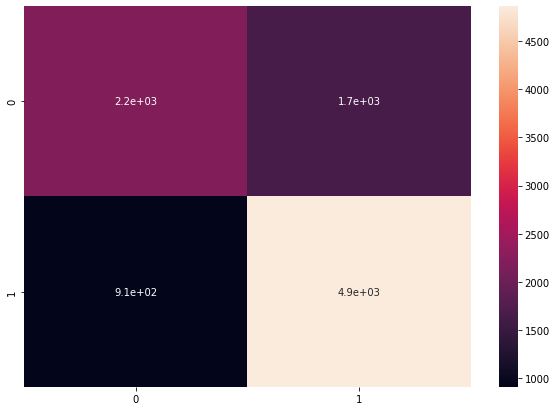

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix_func(predictions, true_vals)
df_cm = pd.DataFrame(cm, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [30]:
accuracy_per_class(predictions, true_vals)
val_f1 = f1_score_func(predictions, true_vals)

print("F1: {:.2f} ".format(val_f1))

Class: 0
Accuracy: 2204/3862

Class: 1
Accuracy: 4859/5771

F1: 0.73 


In [32]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=10,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('/content/gdrive/MyDrive/5153/finetuned_BERT_epoch_1.model', map_location=torch.device(device)))

predictions = predict(dataloader_test)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [33]:
preds = np.argmax(predictions, axis=1)

In [34]:
df_test['Outcome'] = preds

In [35]:
final = df_test[['Id', 'Outcome']]

In [39]:
final.head(2)

,Id,Outcome
0,57525,1
1,62692,1


In [43]:
final.to_csv('/content/gdrive/MyDrive/5153/submission_032702.csv',index=False)